In [89]:
from ner_service import run_comparison
import pandas as pd 

In [87]:
df_gpt_4o = pd.read_csv('ner_train_gpt_4o.csv')
df_gpt_4o_mini = pd.read_csv('ner_train_gpt_4o_mini.csv')
df_golden = pd.read_csv('ner_train_human.csv')
df_mistral_small_24b = pd.read_csv('ner_train_mistral-small-3.2-24b-instruct.csv')
df_gemini_2_flash = pd.read_csv('ner_train_gemini-2.0-flash.csv')

df_gpt_4o.head(2)

,Unnamed: 0.1,Unnamed: 0,id,sentence_text,ner_tags_str,entities_pred,llm_time,llm_prompt_tokens,llm_completion_tokens
0,0,0,13945,"Attendance : 1,800",O O O,[],1.698824,74,11
1,1,1,13382,"Ties between the two neighbours , strained als...",O O O O O O O O O O O O O B-LOC O B-LOC O O O ...,"[{'entity': 'Turkey', 'label': 'LOC'}, {'entit...",4.066634,109,111


In [79]:
df_golden.head(2)

,Unnamed: 0,id,sentence_text,ner_tags_str,entities
0,0,13945,"Attendance : 1,800",O O O,[]
1,1,13382,"Ties between the two neighbours , strained als...",O O O O O O O O O O O O O B-LOC O B-LOC O O O ...,"[{'entity': 'Turkey', 'label': 'LOC'}, {'entit..."


## PRICE

GPT-4o

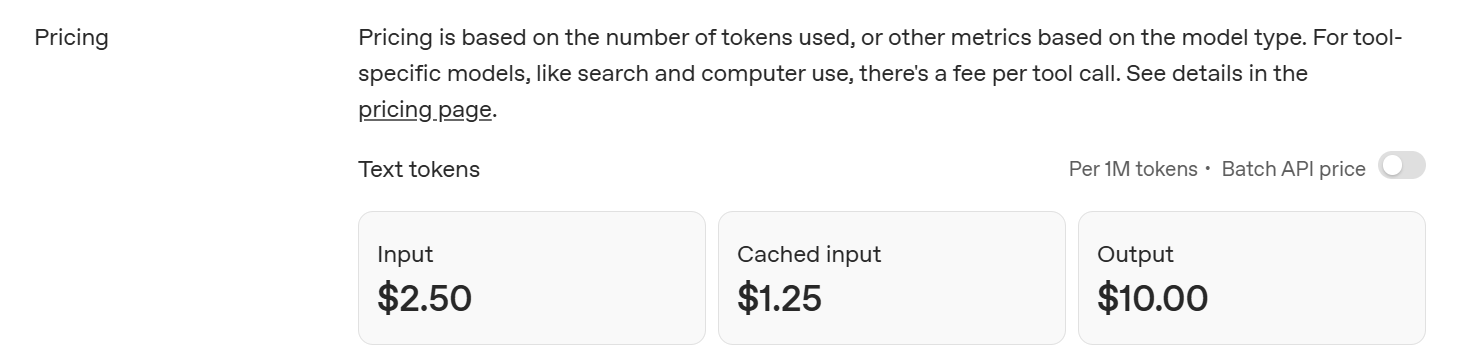

GPT-4o mini

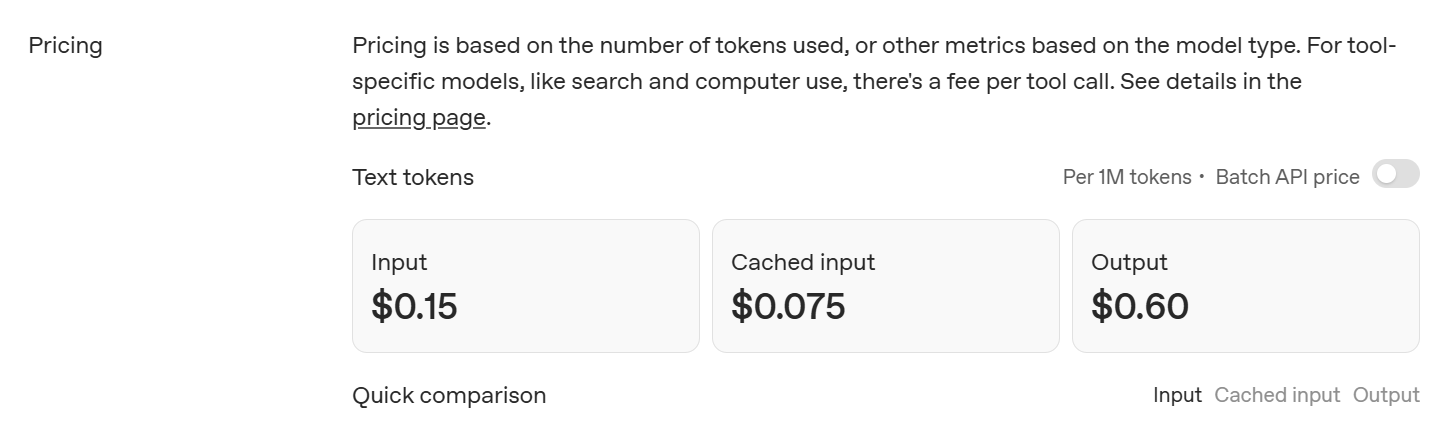

models/gemini-2.0-flash

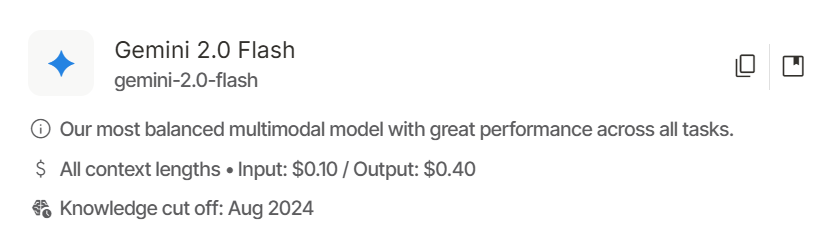

Mistral-Small-3.2-24B-Instruct-2506

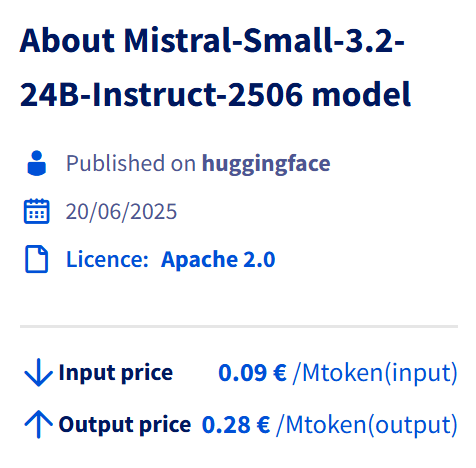

## COMPARE

In [91]:
price_dict = {
    "gpt4o": {
        "prompt": 0.0000025,
        "completion": 0.00001,
    },
    "gpt4o_mini": {
        "prompt": 0.15 / 1000000,
        "completion": 0.6 / 1000000,
    },
    "gemini_2_flash": {
        "prompt": 0.1 / 1000000,
        "completion": 0.4 / 1000000,
    },
    "mistral_small_24b": {
        "prompt": 0.09 / 1000000,
        "completion": 0.28 / 1000000,
    }
}

dfs = {
    "gpt4o": df_gpt_4o,
    "gpt4o_mini": df_gpt_4o_mini,
    "gemini_2_flash": df_gemini_2_flash,
    "mistral_small_24b": df_mistral_small_24b,
}

results_df = run_comparison(dfs, df_golden, price_dict)
results_df.to_csv('best_model_compare_res.csv', index=False)
display(results_df) 

Всего примеров в Golden Dataset: 40


,model,f1,precision,recall,avg_time_sec,avg_cost_usd,count,final_score
2,gemini_2_flash,0.944621,0.950000,0.945833,1.589464,0.000028,40,0.944621
1,gpt4o_mini,0.812222,0.831250,0.800357,1.314325,0.000036,40,0.812222
3,mistral_small_24b,0.762190,0.751845,0.783095,1.898202,0.000024,40,0.762190
0,gpt4o,0.756656,0.756250,0.758333,1.050599,0.000653,40,0.756656


In [82]:
display(df_golden['entities'].head()) 
display(df_gpt_4o['entities_pred'].head())

0                                                   []
1    [{'entity': 'Turkey', 'label': 'LOC'}, {'entit...
2                                                   []
3    [{'entity': 'LIBERIA', 'label': 'LOC'}, {'enti...
4             [{'entity': 'Sorensen', 'label': 'PER'}]
Name: entities, dtype: object

0                                                   []
1    [{'entity': 'Turkey', 'label': 'LOC'}, {'entit...
2                                                   []
3    [{'entity': 'LIBERIA', 'label': 'LOC'}, {'enti...
4                                                   []
Name: entities_pred, dtype: object